Sampling frequency of the sound is fs = 16000 Hz


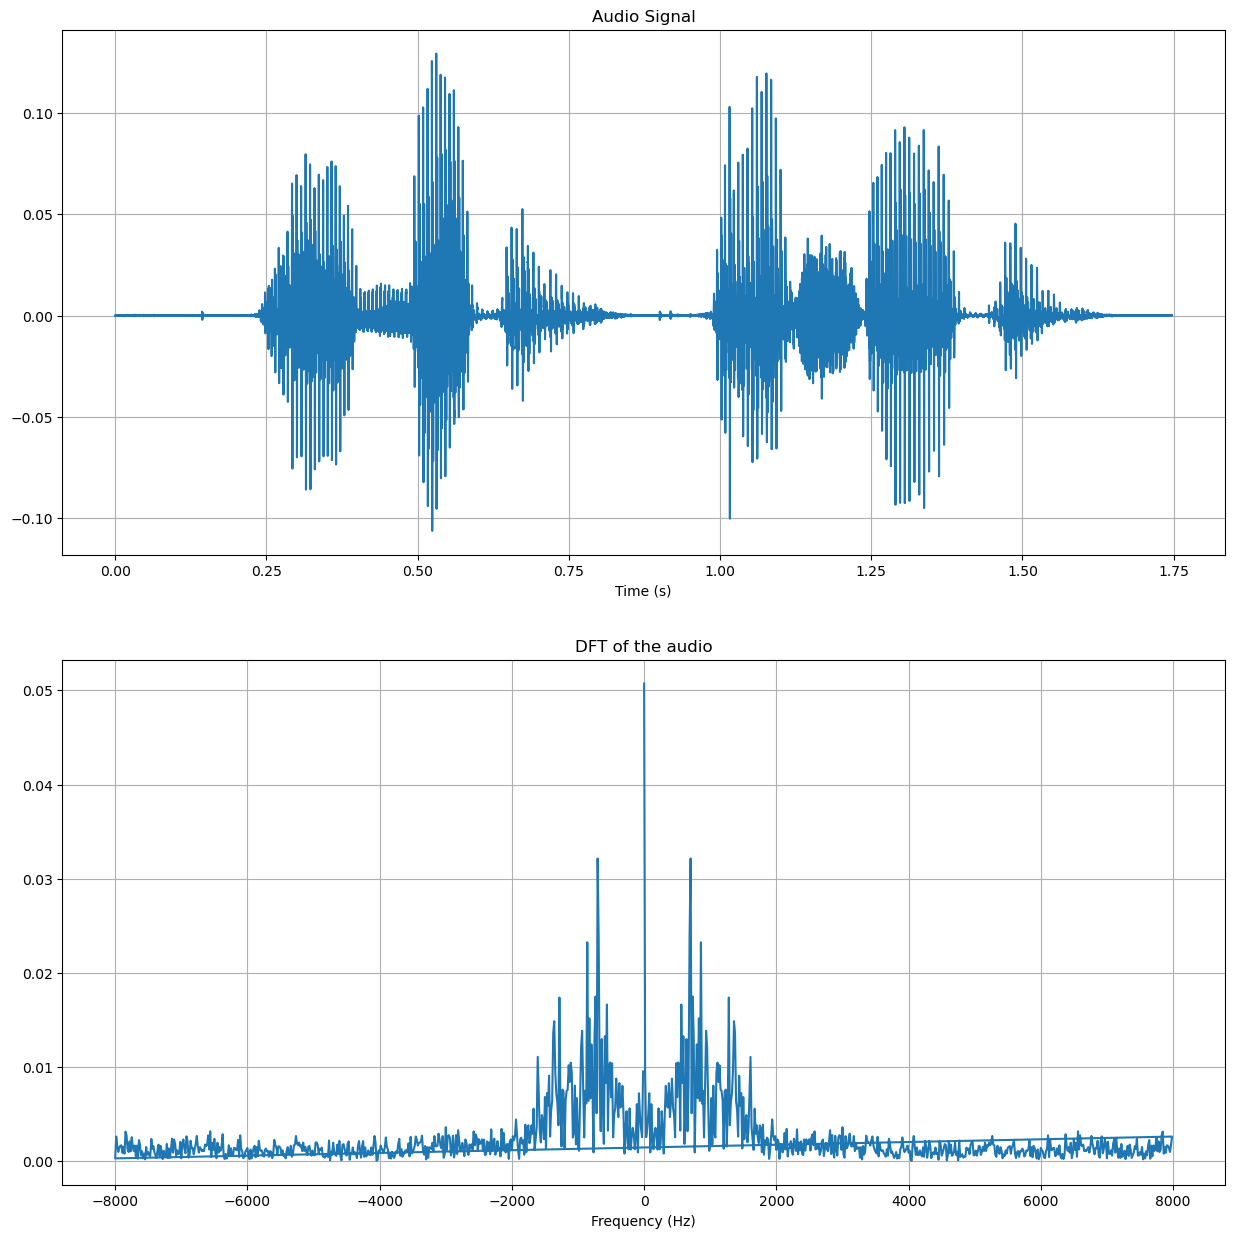

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa 

#2.1
# Read the .wav file
audio,fs = librosa.load("speech_utterance.wav",sr=16000)
print(f"Sampling frequency of the sound is fs = {fs} Hz")

#Graph's size
plt.figure(figsize = (15,15))

#Plotting the audio-time
plt.subplot(2,1,1)
t=np.linspace(0,len(audio)/fs,len(audio))
plt.plot(t,audio)
plt.xlabel("Time (s)")
plt.title("Audio Signal")
plt.grid(True)

#Plotting the DFT of the audio
plt.subplot(2,1,2)
y=np.fft.fft(audio,1024)
f=np.fft.fftfreq(len(y),1/fs)
plt.plot(f,abs(y))
plt.xlabel("Frequency (Hz)")
plt.title("DFT of the audio")
plt.grid(True)







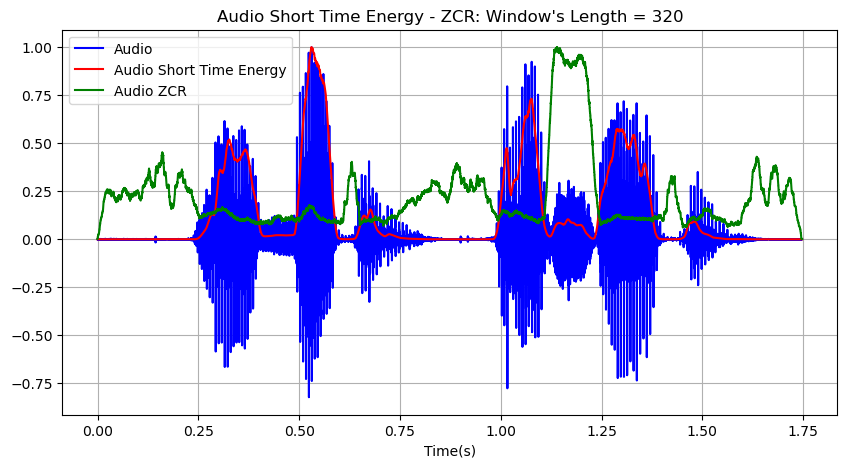

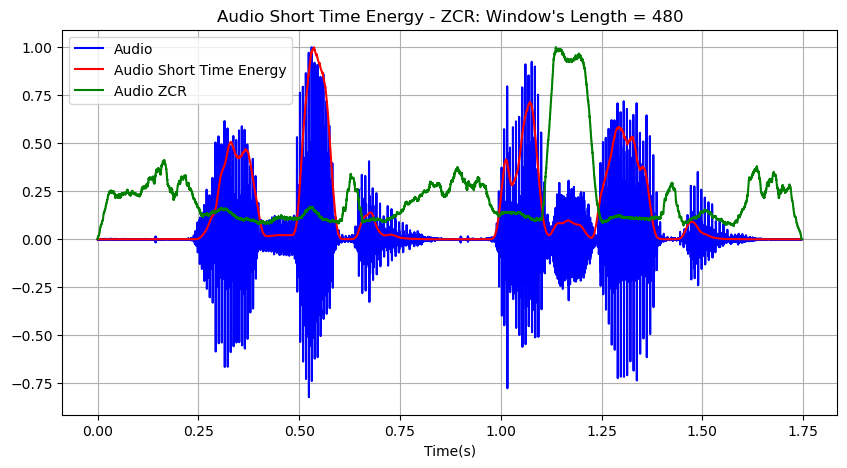

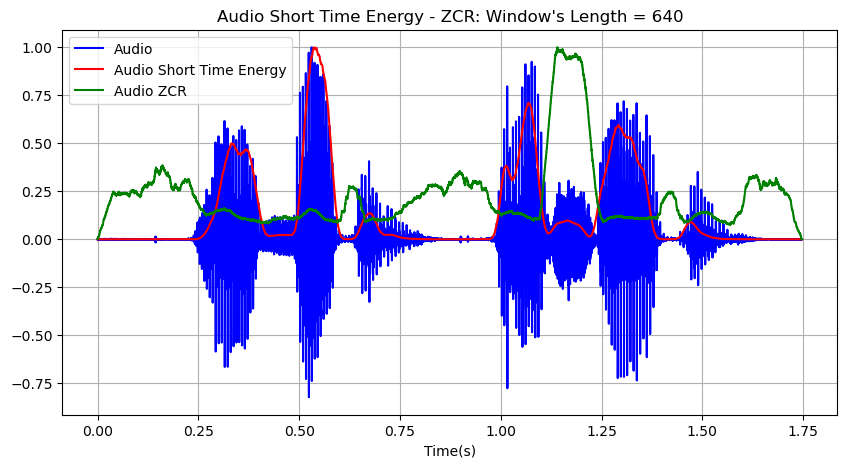

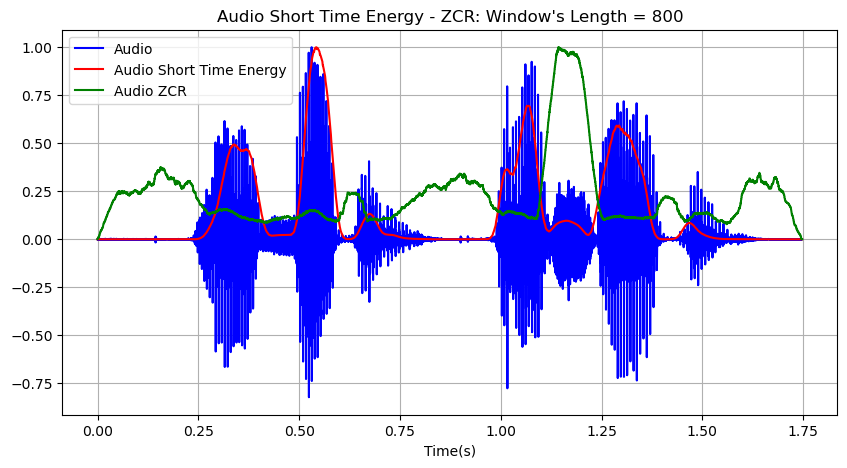

In [2]:
#2.2
from scipy.signal import convolve

#Hamming window's first length value
#Υπολογίζουμε τον αριθμό των δειγμάτων που αντιστοιχουν στη διαρκεια 2μσ -> fs*duration
L =int(fs*0.02) # =320

#Plotting energy and ZCR with window's length between 20-50 
max_length = int(0.05 * fs)  # Maximum length of 50 milliseconds

while(L <= max_length):    
#Hamming and Rectangular windows
    hamming =np.hamming(L)
    rectangular = (1/2*L)*(np.ones(L))
#Short Time Energy 
    audio_sqr = (abs(audio))**2
    En = convolve(audio_sqr,hamming)
    

    #Creating Zero Crossing Rate signal 
    circular_shift_audio = np.roll(audio,1) #audio 1 point circular shift -> audio[m-1]
    #shift_audio = circular_shift_audio[:-1] #remove the 1st point (the old last point)-> audio[m-1]
    sgn1 = np.sign(circular_shift_audio)
    sgn2 = np.sign(audio)
    sgn = abs(sgn1 - sgn2) #|sgn(x[m]) − sgn(x[m − 1])|
    Zn = convolve(sgn,rectangular) #Zero crossing rate signal
    
    #Επειδη η ενεργεια εκτείνεται σε διαφορετικές τιμές απο το Zn , κανονικοποιούμε το Zn,το En και το audio 
    En = En/np.max(abs((En)))
    Zn = Zn/np.max(abs(Zn))
    audio = audio/np.max(audio)
    
#Plotting audio and its Short Time Energy and ZCR 
    plt.figure(figsize = (10,5))
    plt.plot(t,audio,color='blue',label='Audio')
    t1 = np.linspace(0,len(audio)/fs, len(En))
    plt.plot(t1,En,color='red', label = 'Audio Short Time Energy')
    t2 = np.linspace(0, len(audio)/fs, len(Zn))
    plt.plot(t2,Zn,color='green',label = 'Audio ZCR' )
    

    plt.xlabel("Time(s)")
    plt.title(f"Audio Short Time Energy - ZCR: Window's Length = {L}")
    plt.legend()
    plt.grid(True)
    
#New window's length
    L += int(0.01 * fs)







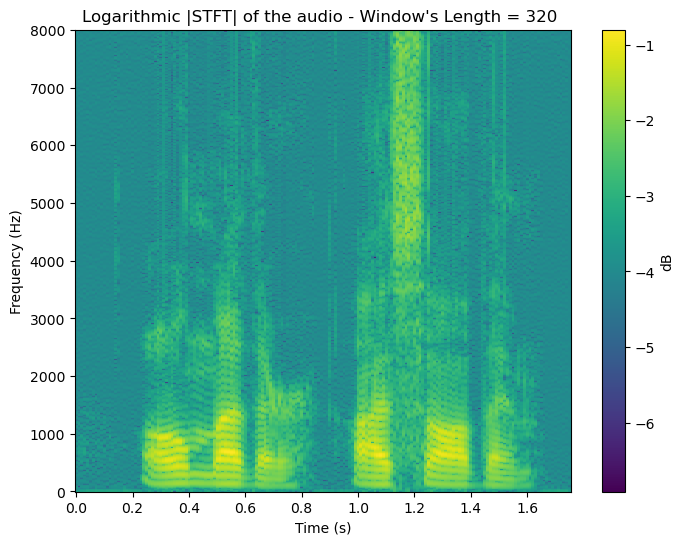

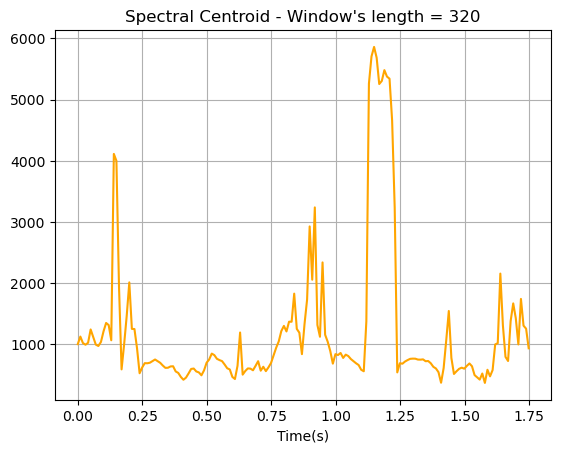

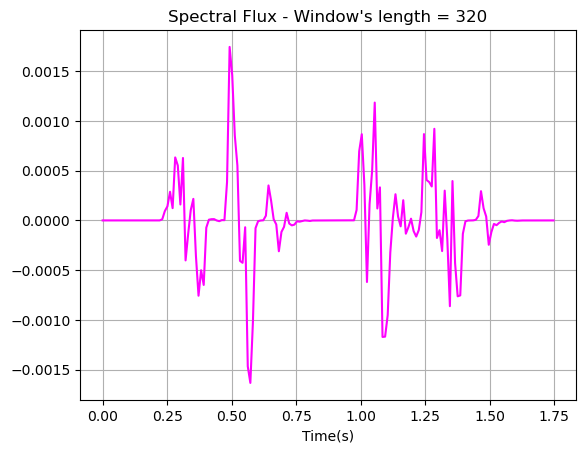

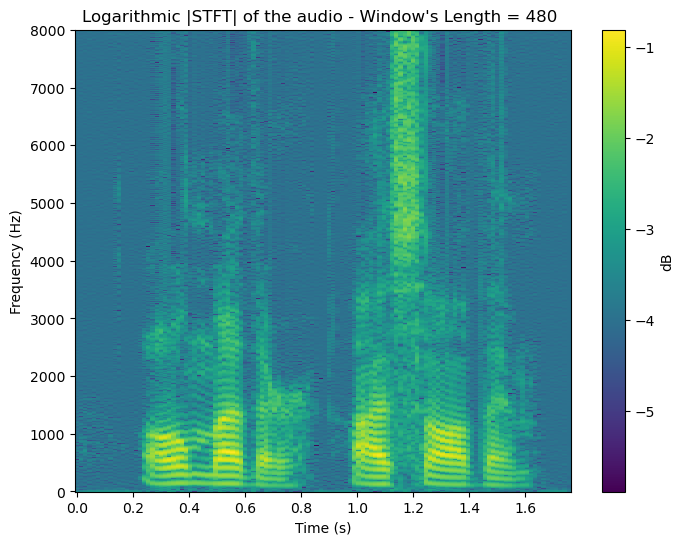

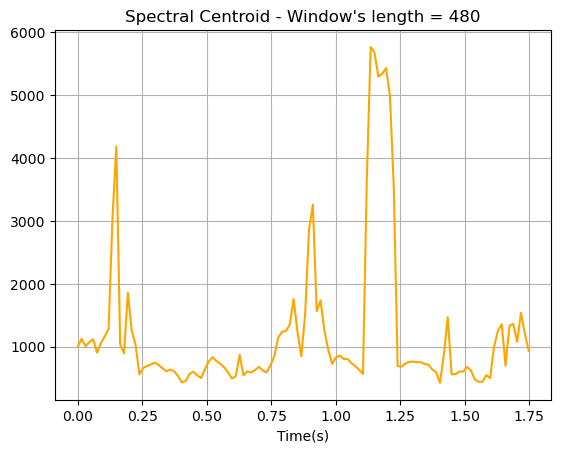

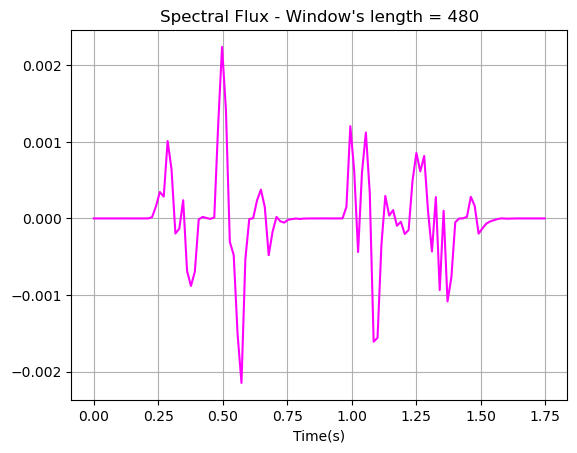

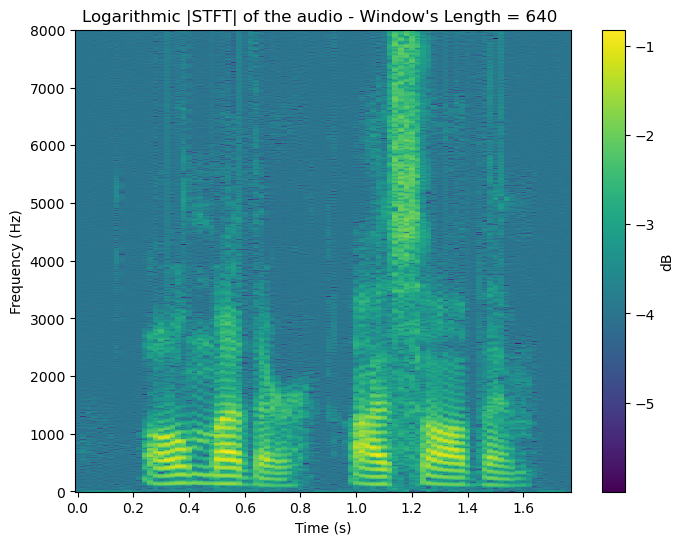

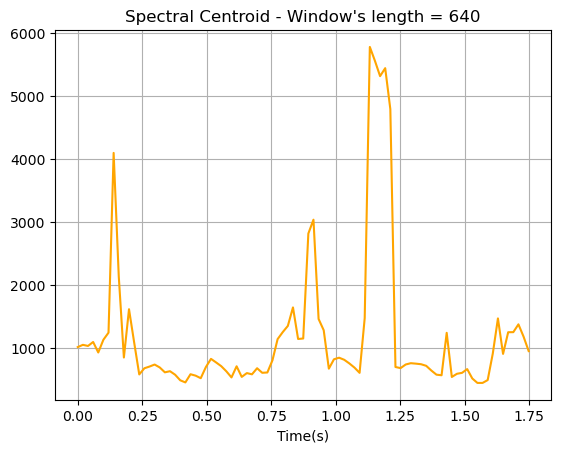

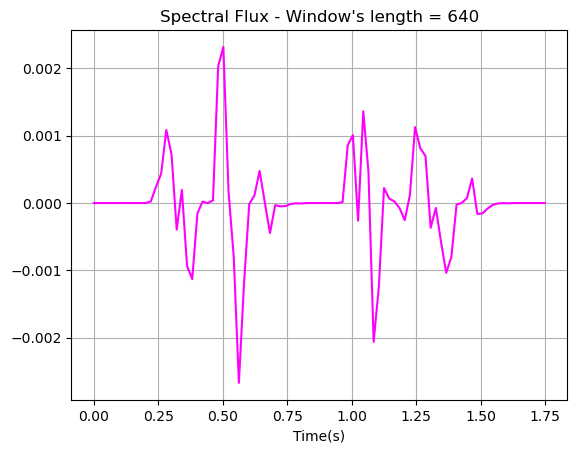

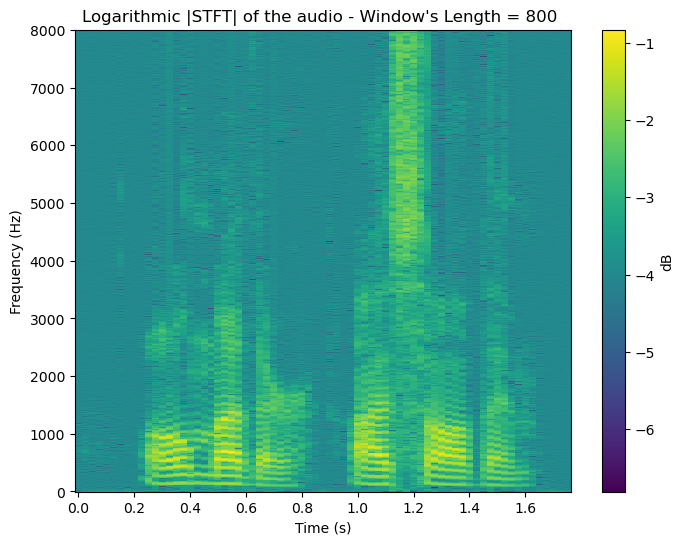

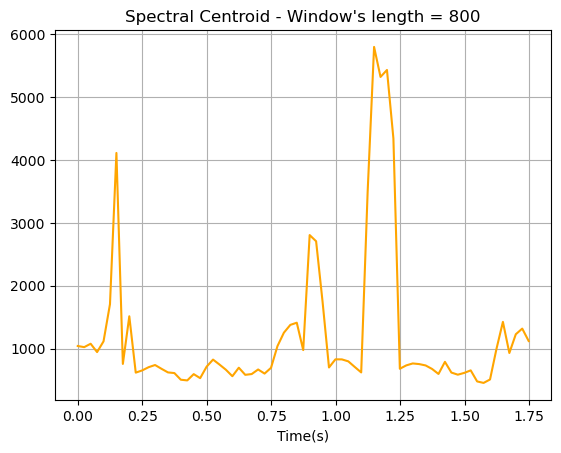

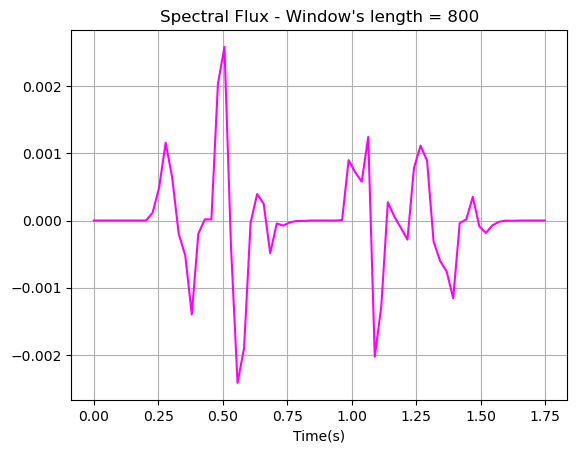

In [4]:
#2.3

#Function for Spectral centroid calculation
def spectral_centroid(X):
#X = STFT
    columns = X.shape[1] #Number of frames (windows)
    rows = X.shape[0] #Frequencies  

#Αριθμιτής
    sum_k_X = np.sum(np.arange(rows)[:, np.newaxis] * np.abs(X)**2, axis=0)
    
#Παρονομαστής    
    sum_X = np.sum(np.abs(X)**2, axis=0)
    
#Spectral Centroid
    SCm= (sum_k_X / sum_X) * (fs/2048)

    #SCm = sum_k_X / sum_X * (columns / 2) * (np.arange(columns) * 2 * np.pi * columns / rows) / columns
    return SCm

#Function for Spectral Flux calculation
def spectral_flux(X):
#X = STFT
    columns = X.shape[1]  # Number of frames (windows)
    
# Compute the squared magnitude difference between adjacent frames
    squared_diff = np.diff(np.abs(X)**2, axis=1)
    
# Compute the spectral flux
    SFm = np.sum(squared_diff, axis=0) / (columns / 2)
    
    return SFm

#MAIN PROGRAMM

#Window's length
#Υπολογίζουμε τον αριθμό των δειγμάτων που αντιστοιχουν στη διαρκεια 2μσ -> fs*duration
L=int(fs*0.02) # = 441
max_length = int(fs*0.05)  # Maximum length of 50 milliseconds


#Creating STFT,Spectral Centroid(SC) and Spectral Flux(SF) of the audio for variable window's length
while(L <= max_length): 
    #STFT 
    freq,times,STFT = sp.signal.stft(audio,fs,window='hamming',nperseg=L,nfft=2048)


    
    #Plotting STF with pseudocolor 
    plt.figure(figsize = (8,6))
    plt.pcolormesh(times,freq, np.log10(np.abs(STFT + 0.0001)), cmap='viridis')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label='dB')
    plt.title(f"Logarithmic |STFT| of the audio - Window's Length = {L} ")



#Plotting Spectral Centroid for window's length between 20-50 ms
    SCm = spectral_centroid(STFT)
    n1 = np.linspace(0,len(audio)/fs,len(SCm))
    plt.figure()
    plt.plot(n1,SCm,color='orange')
    plt.xlabel("Time(s)")
    plt.title(f"Spectral Centroid - Window's length = {L}")
    plt.grid(True)
    
#Plotting Spectral Flux for window's length between 20-50 ms
    SFm = spectral_flux(STFT)
    n2 = np.linspace(0,len(audio)/fs,len(SFm))
    plt.figure()
    plt.plot(n2,SFm,color='magenta')
    plt.xlabel("Time(s)")
    plt.title(f"Spectral Flux - Window's length = {L}")
    plt.grid(True)

#New window's length
    L += int(fs*0.01)


Sampling frequency of the music sound is fs2 = 48000 Hz


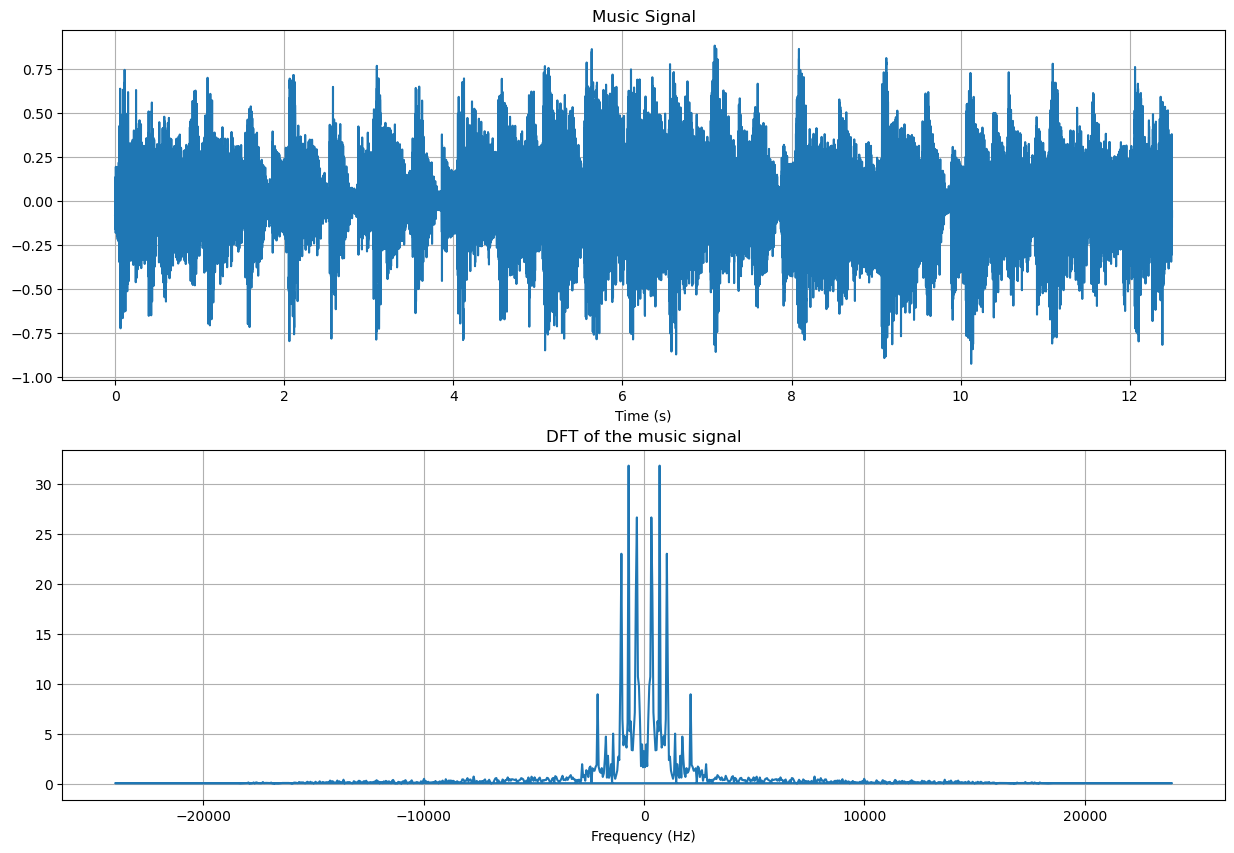

In [6]:
#2.4

#ΕΠΑΝΑΛΑΜΒΑΝΟΥΜΕ ΤΑ ΕΡΩΤΗΜΑΤΑ 2.1 ΕΩΣ 2.3 ΓΙΑ ΤΟ ΣΗΜΑ music.wav και fs=48000

#Plotting music and its DFT

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa 

# Read the .wav file
music,fs2 = librosa.load("music.wav",sr=48000)
print(f"Sampling frequency of the music sound is fs2 = {fs2} Hz")

#Graph's size
plt.figure(figsize = (15,10))

#Plotting the music-time
plt.subplot(2,1,1)
t_m=np.linspace(0,len(music)/fs2,len(music))
plt.plot(t_m,music)
plt.xlabel("Time (s)")
plt.title("Music Signal")
plt.grid(True)

#Plotting the DFT of the music
plt.subplot(2,1,2)
y_m = np.fft.fft(music,1024)
f_m = np.fft.fftfreq(len(y_m),1/fs2)
plt.plot(f_m,abs(y_m))
plt.xlabel("Frequency (Hz)")
plt.title("DFT of the music signal")
plt.grid(True)



C:\Drivers\ANACONDA\envs\anaconda_test\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


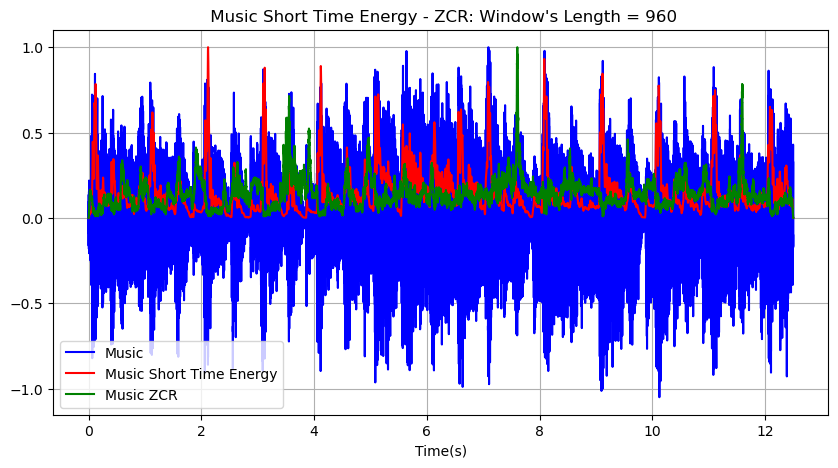

C:\Drivers\ANACONDA\envs\anaconda_test\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


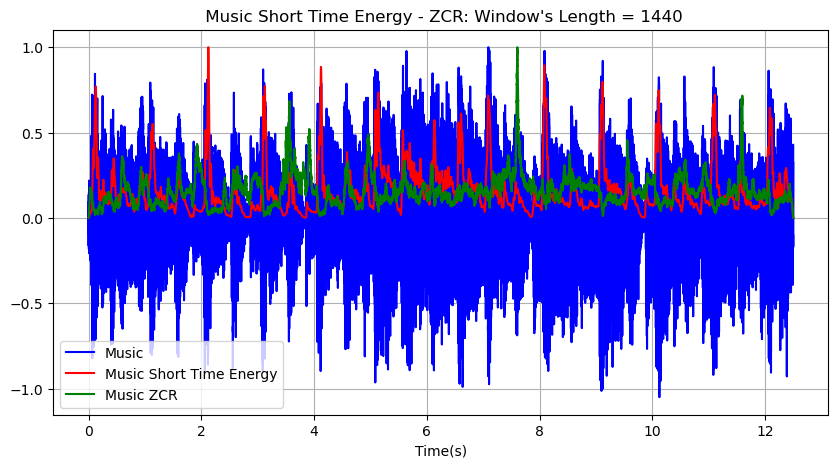

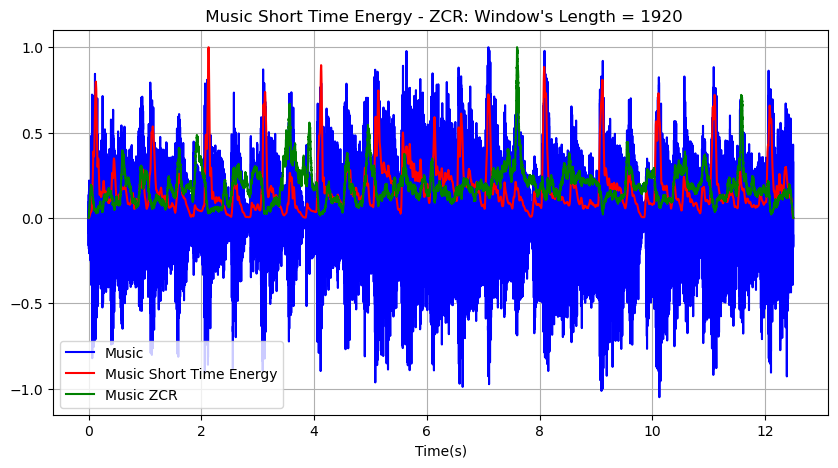

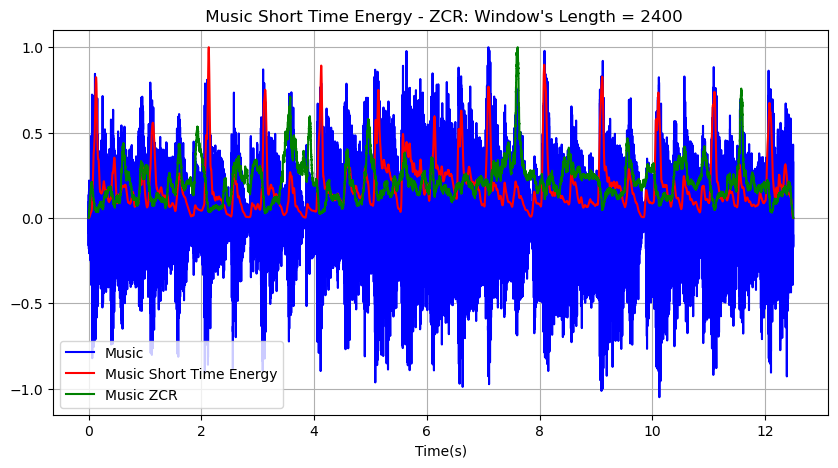

In [7]:
#Shost time Energy, ZC rate of music signal

from scipy.signal import convolve

#Hamming window's first length value
#Υπολογίζουμε τον αριθμό των δειγμάτων που αντιστοιχουν στη διαρκεια 2μσ -> fs*duration
L2 =int(fs2*0.02) # =960

#Plotting energy and ZCR with window's length between 20-50 
max_length2 = int(0.05 * fs2)  # Maximum length of 50 milliseconds

while(L2 <= max_length2):    
#Hamming and Rectangular windows
    hamming2 =np.hamming(L2)
    rectangular2 = (1/2*L2)*(np.ones(L2))
    
#Short Time Energy 
    music_sqr = (abs(music))**2
    En2 = convolve(music_sqr,hamming2)
    

    #Creating Zero Crossing Rate signal 
    circular_shift_music = np.roll(music,1) #music 1 point circular shift -> music[m-1]
    sgn1 = np.sign(circular_shift_music)
    sgn2 = np.sign(music)
    sgn = abs(sgn1 - sgn2) #|sgn(x[m]) − sgn(x[m − 1])|
    Zn2 = convolve(sgn,rectangular2) #Zero crossing rate signal
    
    #Επειδη η ενεργεια εκτείνεται σε διαφορετικές τιμές απο το Zn , κανονικοποιούμε το Zn,το En και το music 
    En2 = En2/np.max(En2)
    Zn2 = Zn2/np.max(abs(Zn2))
    music = music/np.max(music)
    
#Plotting Music and its Short Time Energy and ZCR 
    plt.figure(figsize = (10,5))
    plt.plot(t_m,music,color='blue',label='Music')
    t1_m = np.linspace(0,len(music)/fs2, len(En2))
    plt.plot(t1_m,En2,color='red', label = 'Music Short Time Energy')
    t2_m = np.linspace(0, len(music)/fs2, len(Zn2))
    plt.plot(t2_m,Zn2,color='green',label = 'Music ZCR' )
    

    plt.xlabel("Time(s)")
    plt.title(f" Music Short Time Energy - ZCR: Window's Length = {L2}")
    plt.legend()
    plt.grid(True)
    
#New window's length
    L2 += int(0.01 * fs2)


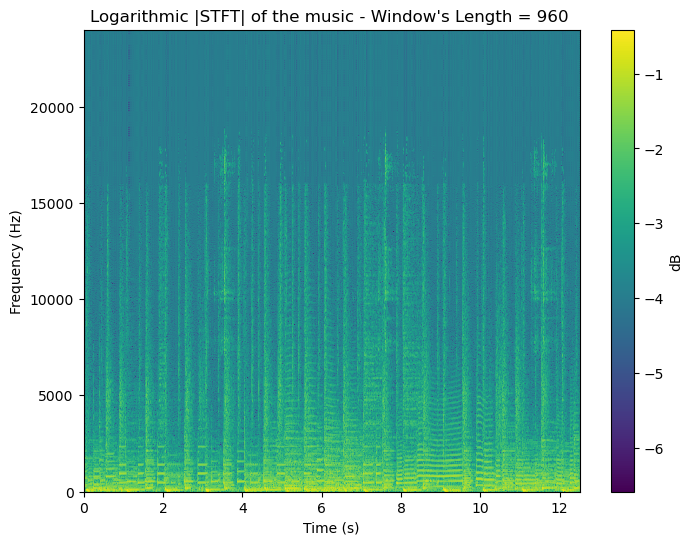

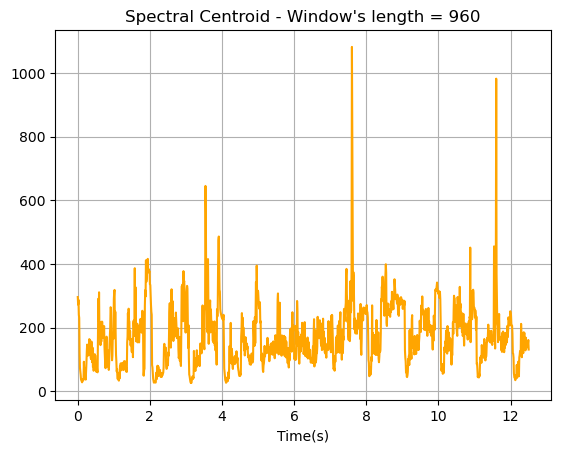

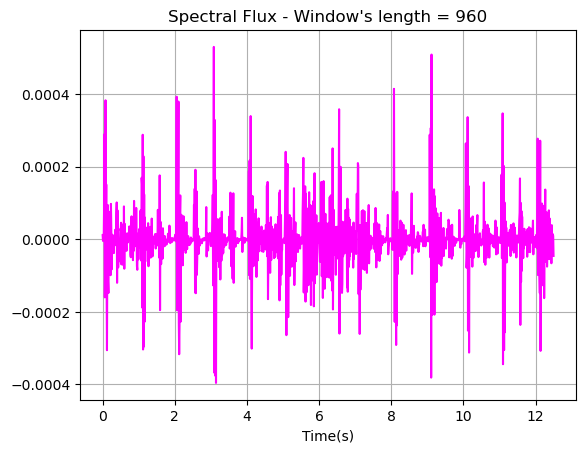

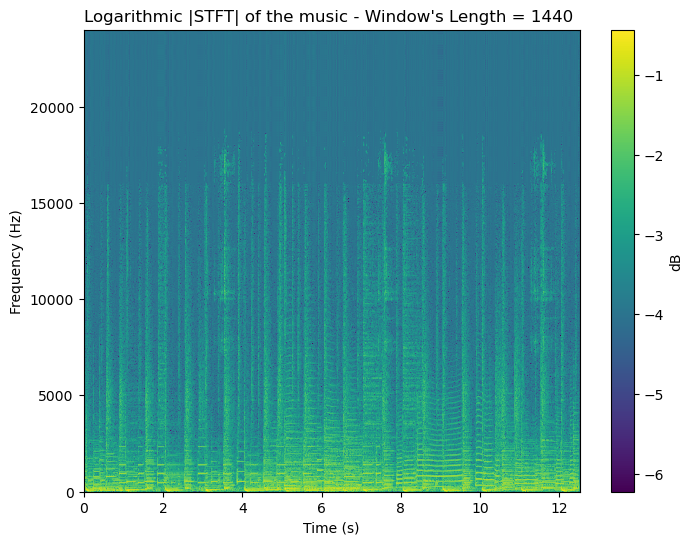

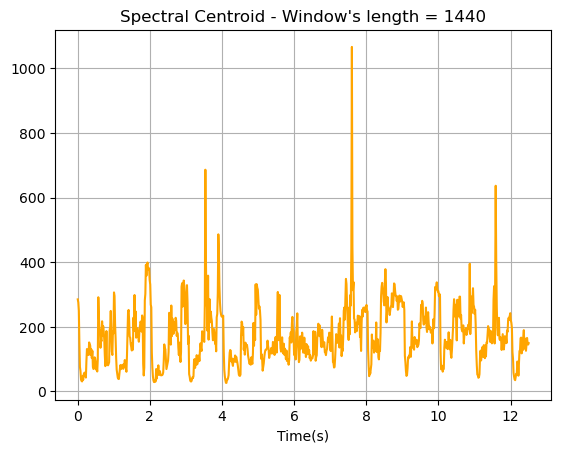

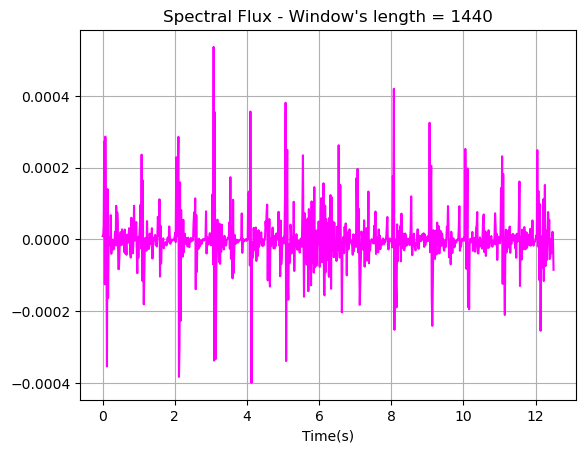

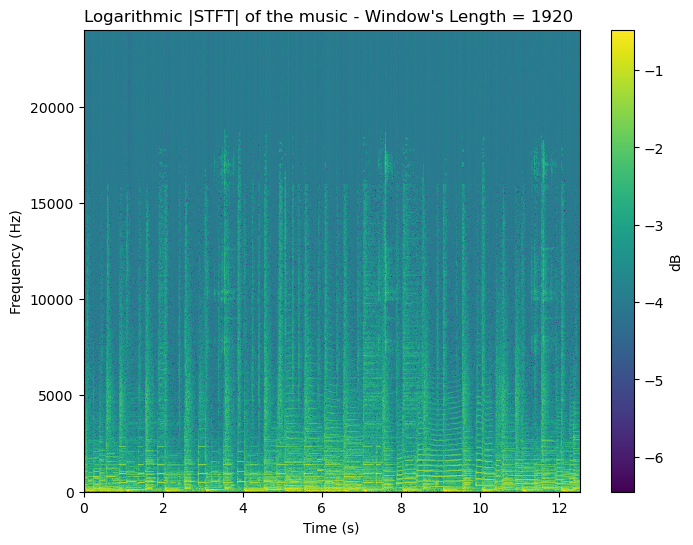

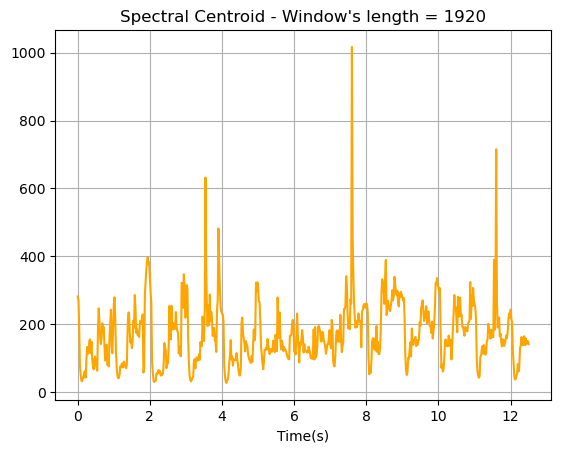

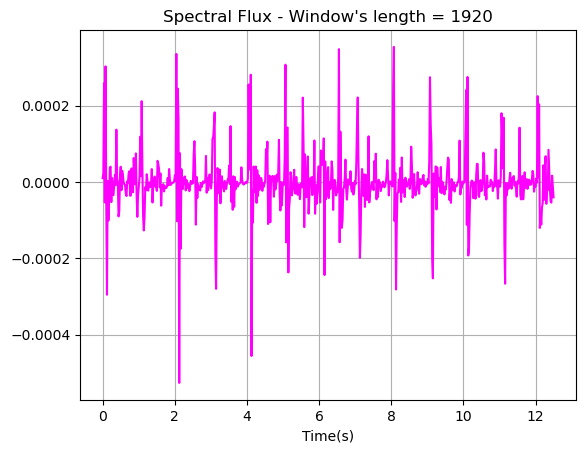

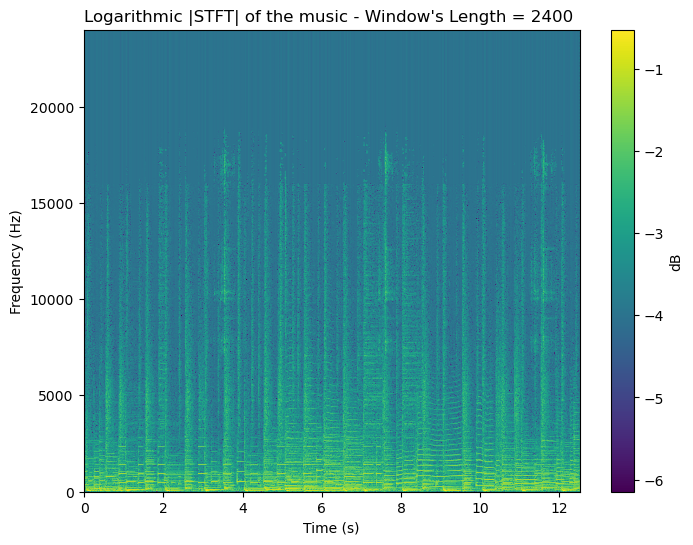

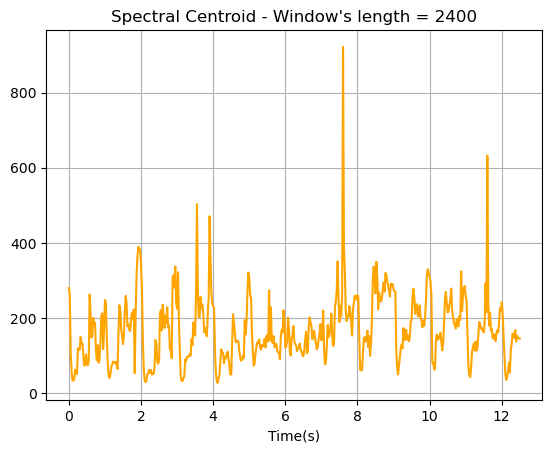

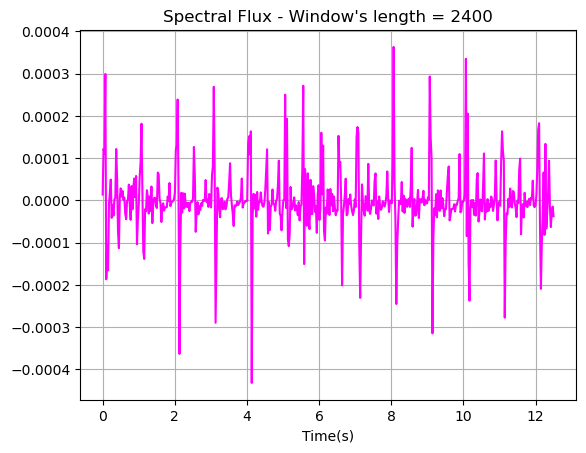

In [8]:
#STFT graph, Scm and SFm of music signal


#Window's length
#Υπολογίζουμε τον αριθμό των δειγμάτων που αντιστοιχουν στη διαρκεια 2μσ -> fs*duration
L2=int(fs2*0.02) # = 960
max_length2 = int(fs2*0.05)  # Maximum length of 50 milliseconds


#Creating STFT,Spectral Centroid(SC) and Spectral Flux(SF) of the audio for variable window's length
while(L2 <= max_length2): 
    #STFT 
    freq2,times2,STFT2 = sp.signal.stft(music,fs2,window='hamming',nperseg=L2,nfft=2400)
    #Βαλαμε nfft=2400 σημεία γιατι στο τελευταιο παραθυρο εχουμε nperseg=2400>2048 και δε δουλευε η stft()
    


    
#Plotting STF with pseudocolor 
    plt.figure(figsize = (8,6))
    plt.pcolormesh(times2,freq2, np.log10(np.abs(STFT2 + 0.0001)), cmap='viridis')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label='dB')
    plt.title(f"Logarithmic |STFT| of the music - Window's Length = {L2} ")


#Plotting Spectral Centroid for window's length between 20-50 ms
    SCm2 = spectral_centroid(STFT2)
    n1_m = np.linspace(0,len(music)/fs2,len(SCm2))
    plt.figure()
    plt.plot(n1_m,SCm2,color='orange')
    plt.xlabel("Time(s)")
    plt.title(f"Spectral Centroid - Window's length = {L2}")
    plt.grid(True)
    
#Plotting Spectral Flux for window's length between 20-50 ms
    SFm2 = spectral_flux(STFT2)
    n2_m = np.linspace(0,len(music)/fs2,len(SFm2))
    plt.figure()
    plt.plot(n2_m,SFm2,color='magenta')
    plt.xlabel("Time(s)")
    plt.title(f"Spectral Flux - Window's length = {L2}")
    plt.grid(True)


#New window's length
    L2 += int(0.01 * fs2)

